##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load Fashion MNIST data


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train:", x_train.shape)  # (60000, 28, 28)
print("y_train:", y_train.shape)  # (60000,)
print("x_test :", x_test.shape)   # (10000, 28, 28)
print("y_test :", y_test.shape)   # (10000,)

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")


x_train: (60000, 28, 28)
y_train: (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)
Number of classes: 10


In [4]:
# Define class names
class_names = [ "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

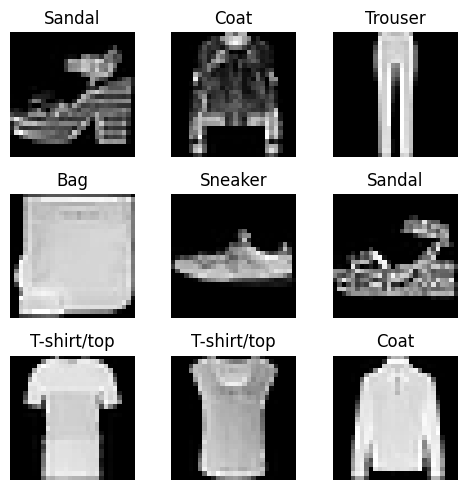

In [6]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(5, 5))

for i in range(9):
    idx = np.random.randint(0, len(x_train))

    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx], cmap="gray")   # grayscale
    plt.title(class_names[y_train[idx]])
    plt.axis("off")

plt.tight_layout()
plt.show()


[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


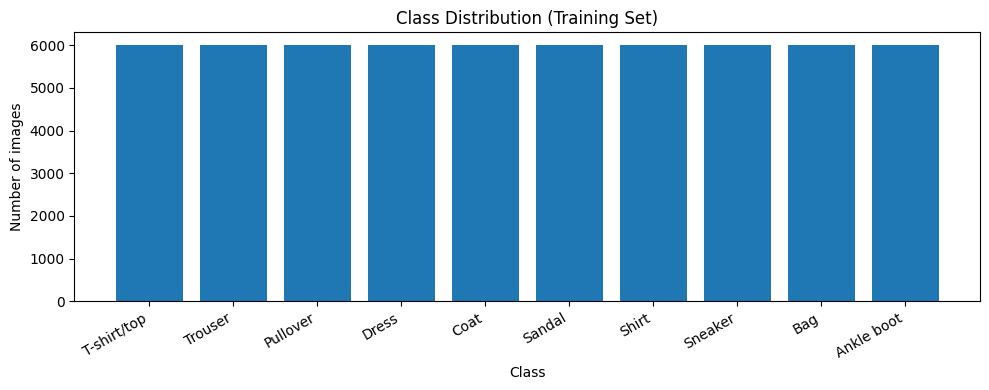

In [8]:
# Count occurrences of each class in the training set

class_counts = np.bincount(y_train)
print(class_counts)

# Plot the class distribution
plt.figure(figsize=(10, 4))
plt.bar(class_names, class_counts)

plt.title("Class Distribution (Training Set)")
plt.xlabel("Class")
plt.ylabel("Number of images")

plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [ ]:
# Import libraries
    # Done
# Normalize pixel values for x_train and x_test
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)









In [11]:
# Build a CNN model
num_classes = len(np.unique(y_train))

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

/opt/anaconda3/envs/cv_lab/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [17]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8396 - loss: 0.4332 - val_accuracy: 0.8530 - val_loss: 0.3926
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8436 - loss: 0.4209 - val_accuracy: 0.8507 - val_loss: 0.3888
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8483 - loss: 0.4091 - val_accuracy: 0.8562 - val_loss: 0.3794
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8540 - loss: 0.3976 - val_accuracy: 0.8572 - val_loss: 0.3808
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8578 - loss: 0.3865 - val_accuracy: 0.8587 - val_loss: 0.3702
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8611 - loss: 0.3787 - val_accuracy: 0.8623 - val_loss: 0.3572
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8626 - loss: 0.3708 - val_accuracy: 0.8680 - val_loss: 0.3470
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8672 - loss: 0.3617 - val_accuracy: 

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

Test loss: 0.3416 | Test accuracy: 0.8763
